<a href="https://colab.research.google.com/github/cristalAC/Prueba/blob/main/Trastornos_del_sue%C3%B1o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importamos las librerías que se van a utilizar

In [1]:
import numpy as np # linear algebra
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder,LabelEncoder ,RobustScaler,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,StratifiedKFold,cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

Importamos el libro de datos para leerlo

In [2]:
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

Vamos a mostrar los primeros datos de nuestro libro

In [3]:
df.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Se comienza realizando un Análisis Exploratorio de los Datos o (EDA) según el proyecto de Kaggle original.

Se llama a las funciones .shape y dtypes para saber el número de filas y columnas de nuestro dataframe y también el tipo de variables que tenemos.

In [4]:
df.shape


(374, 13)

In [5]:
df.dtypes

,0
Person ID,int64
Gender,object
Age,int64
Occupation,object
Sleep Duration,float64
Quality of Sleep,int64
Physical Activity Level,int64
Stress Level,int64
BMI Category,object
Blood Pressure,object


Después con la función .describe() obtenemos los valores estadísticos más importantes del dataframe, como la media, mediana, desviación estándar, etc.

In [6]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


Después, identificamos los valores únicos que tenemos para cada columna del dataframe, exceptuando la columna ID.

In [7]:
columns = [column for column in df.columns if column!='Person ID']
for column in columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Gender': ['Male' 'Female']
Unique values in 'Age': [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52
 53 54 55 56 57 58 59]
Unique values in 'Occupation': ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
Unique values in 'Sleep Duration': [6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1
 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]
Unique values in 'Quality of Sleep': [6 4 7 5 8 9]
Unique values in 'Physical Activity Level': [42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]
Unique values in 'Stress Level': [6 8 7 4 3 5]
Unique values in 'BMI Category': ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Unique values in 'Blood Pressure': ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95

Después, es momento de identificar y reemplazar los valores nulos que contiene nuestro dataframe, por ejemplo, en la columna Sleep Disorder se muestran algunas filas con valores nulos, para ello se reemplazan estos valores con el valor 'No disorder'

In [8]:
df['Sleep Disorder'].fillna('No Disorder', inplace=True)

Y después mostramos el número de valores que tenemos para cada categoría de esta columna.

In [9]:
sleep_disorder_counts = df['Sleep Disorder'].value_counts()

print("Value counts of 'Sleep Disorder':")
print(sleep_disorder_counts)

Value counts of 'Sleep Disorder':
Sleep Disorder
No Disorder    219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


Se reemplaza el valor 'Normal' de la columna 'BMI Category' por 'Normal weight' y se muestra el conteo de los valores de esta columna.


In [10]:
df['BMI Category']=df['BMI Category'].replace({'Normal':'Normal Weight'})
df['BMI Category'].value_counts()

,count
BMI Category,
Normal Weight,216
Overweight,148
Obese,10


Después se crean algunos gráficos que nos permiten interpretar de forma visual algunos datos relevantes.

Se crea una gráfica de barras apiladas donde observamos el conteo de los tipos de trastornos del sueño según la categoría de índice de masa corporal.

In [11]:
fig = px.histogram(data_frame=df, x = 'BMI Category', color = 'Sleep Disorder', title='Bar Chart of BMI Category Counts')
fig.show()

A partir de esta primer gráfica podemos observar que en la categoría de peso normal existe una gran proporción de 'No disorder' a comparación de las categorías sobrepeso y obeso. Además de que en 'Obese' se tiene más comúnmente trastornos de apnea e insomnio.

Después se muestra una nueva gráfica de barras donde se visualiza el conteo de la calidad del sueño según el tipo de trastorno del sueño que se experimenta.

In [12]:
fig = px.histogram(data_frame=df, x = 'Quality of Sleep', color = 'Sleep Disorder', title='Bar Chart of Quality of Sleep counts')
fig.show()

Ahora se muestra otra gráfica donde se desglosan las ocupaciones de las personas y los tipos de trastornos del sueño que experimentan.

In [13]:
fig = px.histogram(data_frame=df, x = 'Occupation', color = 'Sleep Disorder', title='Bar Chart of BMI Occupation counts')
fig.show()

Después se muestra un gráfico de violín para visualizar la calidad del sueño según el género.

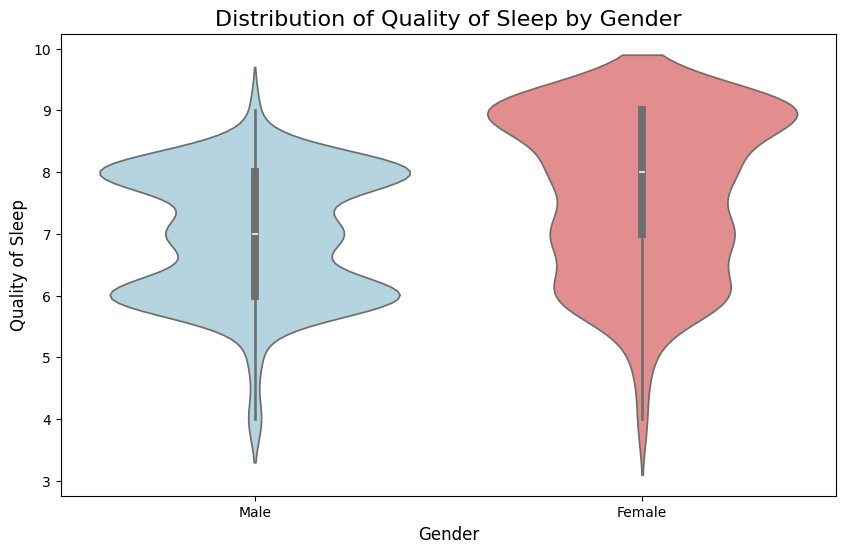

In [14]:
color_palette = {'Male': 'lightblue', 'Female': 'lightcoral'}
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Quality of Sleep', data=df, palette=color_palette)
plt.title('Distribution of Quality of Sleep by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Quality of Sleep', fontsize=12)
plt.show()

Después tenemos un nuevo gráfico de barras para visualizar la relación entre el nivel de estrés y la calidad del sueño.

In [15]:
fig = px.bar(df,
             x='Stress Level',
             y='Quality of Sleep',
             color='Stress Level',
             title='Relationship between Stress Level and Quality of Sleep'
            )
fig.show()

A continuación se separan los valores de la presión arterial para dividirlos en presión sistólica y diastólica.

In [16]:
df = pd.concat([df, df['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
df = df.rename(columns={0: 'Systolic', 1: 'Diastolic'})
df['Systolic'] = df['Systolic'].astype(float)
df['Diastolic'] = df['Diastolic'].astype(float)

Después se separan las características numéricas del dataframe para obtener una gráfica de correlación de las mismas.



(Aquí también se añadió el valor de 'Stress Level')

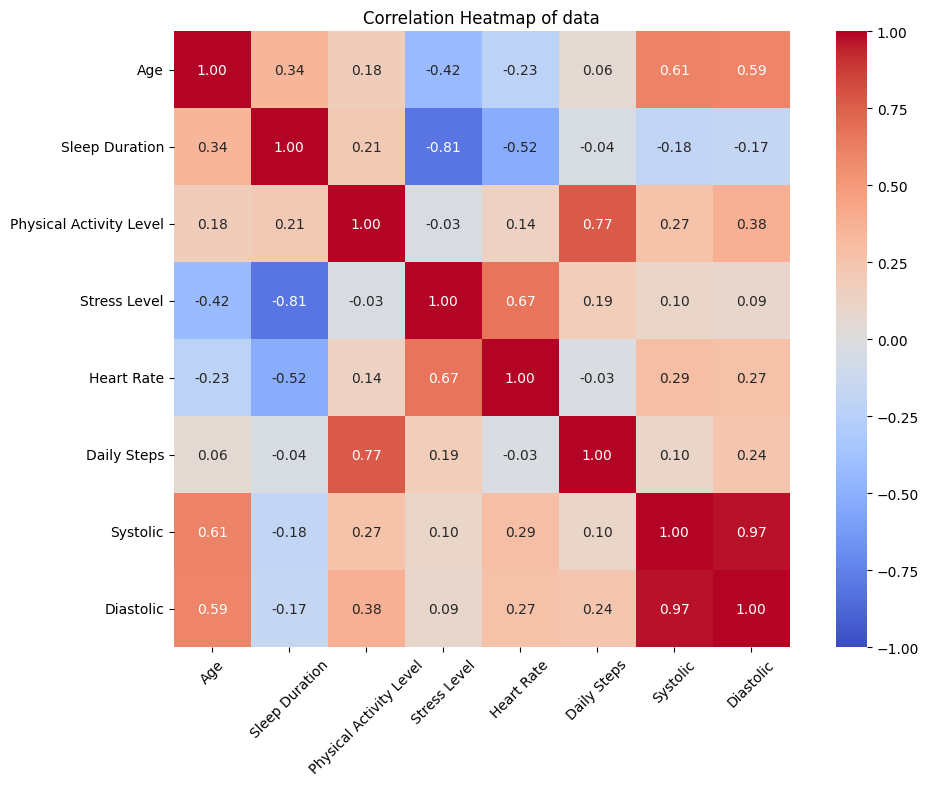

In [17]:
numeric_features = ['Age', 'Sleep Duration',
                    'Physical Activity Level', 'Stress Level',
                    'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic']
# Calculate the correlation matrix
corr_matrix = df[numeric_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap without the mask
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, square=True)

# Customize plot labels and title
plt.title('Correlation Heatmap of data')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show plot
plt.show()

Se elimina la columna 'ID' ya que no es relevante para el análisis

In [18]:
df.drop(columns=['Person ID'],inplace = True)

Después se hace uso de codificación para modificar los datos categóricos que en este caso son los de la columna 'Sleep Disorder', para transformarlos en valores numéricos y que estos puedan ser procesados por nuestros modelos de forma más sencilla.


In [19]:
label_encoder = LabelEncoder()
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])
print(label_encoder.classes_)

['Insomnia' 'No Disorder' 'Sleep Apnea']


**ETAPA DE PREPROCESAMIENTO**

En esta etapa se definen dos tipos de factores, numéricos y categóricos, y se realiza un proceso de escalamiento para los valores numéricos para que así los modelos de ML puedan trabajar con estos valores.

In [20]:
numeric_features = ['Age', 'Sleep Duration',
                    'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic']

categorical_features = ['Occupation','Quality of Sleep','Gender',
                    'Physical Activity Level', 'Stress Level', 'BMI Category']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first',sparse_output =False, handle_unknown='ignore'), categorical_features)
    ])
X = df.drop(columns=['Sleep Disorder'])
y = df['Sleep Disorder']
X_preprocessed = preprocessor.fit_transform(X)

Después se trabaja usando la técnica SMOTE para los datos que estén desbalanceados.

In [23]:
smote = SMOTE(random_state=42)

# Perform SMOTE oversampling
X_smote, y_smote = smote.fit_resample(X_preprocessed, y)
X_smote.shape

(657, 44)

Y después se separan los datos en aquellos que serán utilizados como datos de entrenamiento y datos de prueba. Ahí se especifíca con test_size que 25% de los datos serán de prueba.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=42)

**Modelos de entrenamiento**

Aquí se comienzan a implementar los diferentes modelos de entrenamiento.


1. Modelo de regresión logística

Accuracy: 0.9090909090909091
Precision: 0.910767756617559
Recall: 0.9090909090909091
F1-score: 0.9084234273263183
              precision    recall  f1-score   support

           0       0.94      0.82      0.87        38
           1       0.88      0.95      0.92        64
           2       0.92      0.92      0.92        63

    accuracy                           0.91       165
   macro avg       0.91      0.90      0.90       165
weighted avg       0.91      0.91      0.91       165

Confusion Matrix:
[[31  3  4]
 [ 2 61  1]
 [ 0  5 58]]


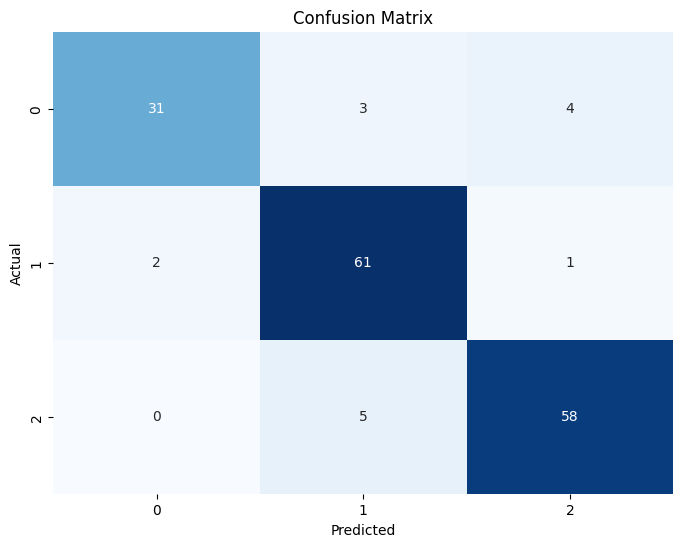

In [26]:
# Initialize Logistic Regression classifier
model_lr = LogisticRegression()

# Fit the model on the training data
model_lr.fit(X_train, y_train)

# Predict on the test data
y_pred_lr = model_lr.predict(X_test)

# Calculate evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

# Print metrics
print(f'Accuracy: {accuracy_lr}')
print(f'Precision: {precision_lr}')
print(f'Recall: {recall_lr}')
print(f'F1-score: {f1_lr}')

# Generate classification report
print(classification_report(y_test, y_pred_lr))

# Generate confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print('Confusion Matrix:')
print(cm_lr)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

2. Modelo XGB

Accuracy: 0.9272727272727272
Precision: 0.9287307861220904
Recall: 0.9272727272727272
F1-score: 0.9271254483064495
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        38
           1       0.90      0.97      0.93        64
           2       0.97      0.92      0.94        63

    accuracy                           0.93       165
   macro avg       0.93      0.92      0.92       165
weighted avg       0.93      0.93      0.93       165

Confusion Matrix:
[[33  3  2]
 [ 2 62  0]
 [ 1  4 58]]


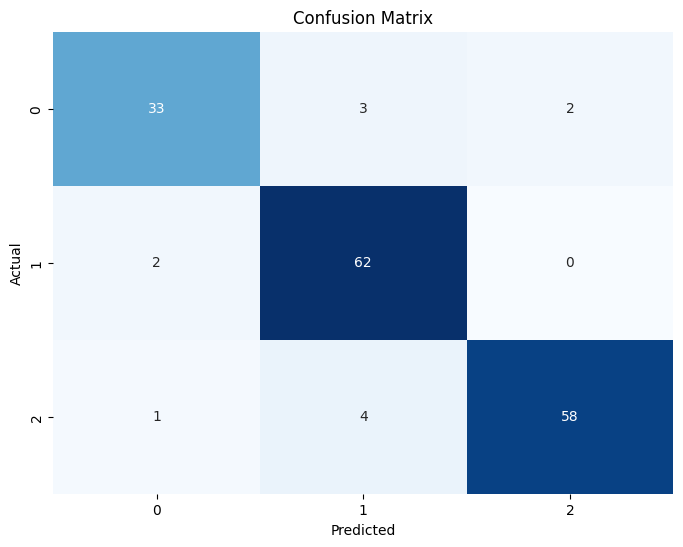

In [27]:
# Initialize XGBoost classifier (assuming classification task)
model_xgb = xgb.XGBClassifier()

# Fit the model on the training data
model_xgb.fit(X_train, y_train)

# Predict on the test data
y_pred = model_xgb.predict(X_test)
# Calculate evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred, average='weighted')
recall_xgb = recall_score(y_test, y_pred, average='weighted')
f1_xgb = f1_score(y_test, y_pred, average='weighted')

# Print metrics
print(f'Accuracy: {accuracy_xgb}')
print(f'Precision: {precision_xgb}')
print(f'Recall: {recall_xgb}')
print(f'F1-score: {f1_xgb}')

# Generate classification report
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()